<a href="https://colab.research.google.com/github/nioke-dev/PCVK_Genap_2024/blob/main/Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Indentitas
Kelompok 6:

Andreagazy Iza Amerianto (2241720146)

Joyo Sugito (2241720050)

Muhammad Nurul Mustofa (2141720054)

Kelas: TI - 3A

# **Praktikum**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

**Transformasi Linier Brightness**

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


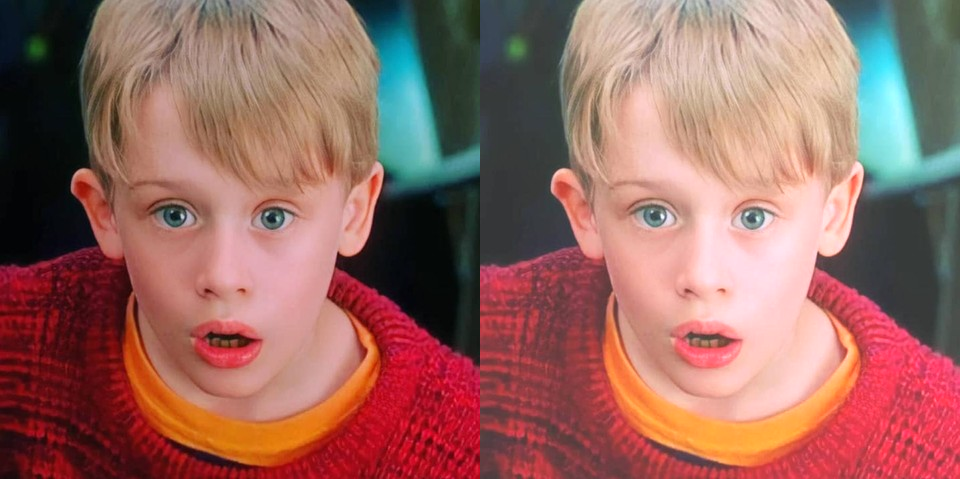

In [7]:

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

ori = cv.imread('/content/drive/MyDrive/Colab Notebooks/image/gambar_anak_kecil.jpeg')
brightness_img = np.zeros(ori.shape, ori.dtype)

# Akses per pixel
# for y in range(ori.shape[0]):
#   for x in range(ori.shape[1]):
#     for c in range(ori.shape[2]):
#       brightness_img[y,x,c] = np.clip(ori[y,x,c]+brightness,0,255) # formula g(x)=f(x)+b

# Cara simple tanpa loop
brightness_img = cv.convertScaleAbs(ori, beta=brightness)

final_frame = cv.hconcat((ori, brightness_img))
cv2_imshow(final_frame)

# **Tugas**
**Inverse Color**

Mengubah warna menjadi negatif
------------------------------


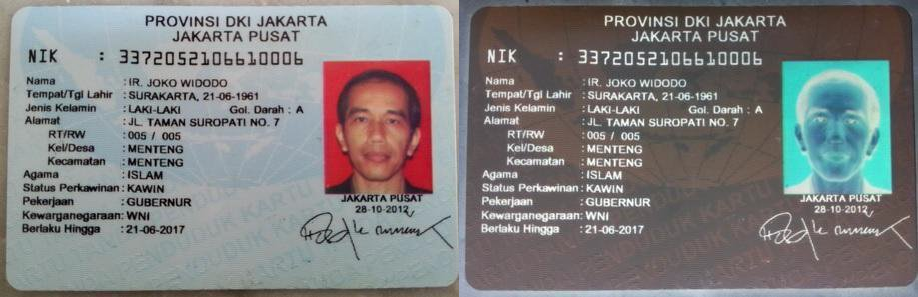

In [17]:
print('Mengubah warna menjadi negatif')
print('------------------------------')
ktp = cv.imread('/content/drive/MyDrive/Colab Notebooks/image/ktp.jpeg') # membaca gambar
inverse = ktp.copy() # membuat salinan gambar asli untuk gambar manipulasi
for y in range(ktp.shape[0]): # iterasi baris gambar
  for x in range(ktp.shape[1]): # iterasi kolom gambar
    for c in range(ktp.shape[2]): # iterasi warna (R, G, B) di setiap pixel
      inverse[y,x,c] = np.clip(255-ktp[y,x,c],0,255) # formula untuk membalikkan warna gambar yaitu g(x)=255-f(x)

final_frame = cv.hconcat((ktp, inverse)) # menggabungkan 2 gambar menjadi 1
cv2_imshow(final_frame) # menampilkan gambar

**Transformasi Constrast**

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


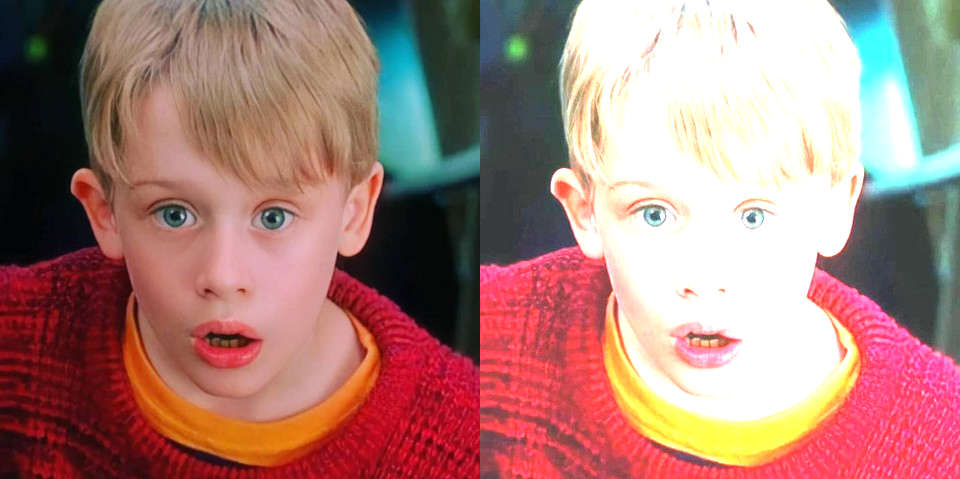

In [10]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------------------')
try: # untuk menangani error
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: ')) # membuat inputan user
  contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError: # menjalankan kode ketika error
  print('Error, not a number') # menampilkan message, penanda error

constrast_img = ori.copy()  # membuat salinan gambar asli untuk gambar manipulasi

for y in range(ori.shape[0]): # iterasi baris gambar
  for x in range(ori.shape[1]): # iterasi kolom gambar
    for c in range(ori.shape[2]): # iterasi warna (R, G, B) di setiap pixel
      constrast_img[y,x,c] = np.clip(contrast*ori[y,x,c]+brightness,0,255) # formula untuk memanipulasi kontras pada gambar yaitu g(x,y)=a*f(x,y)+b

final_frame = cv.hconcat((ori, constrast_img)) # menggabungkan 2 gambar menjadi 1
cv2_imshow(final_frame) # menampilkan gambar

**Transformasi Logarithmic Brightness**

Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


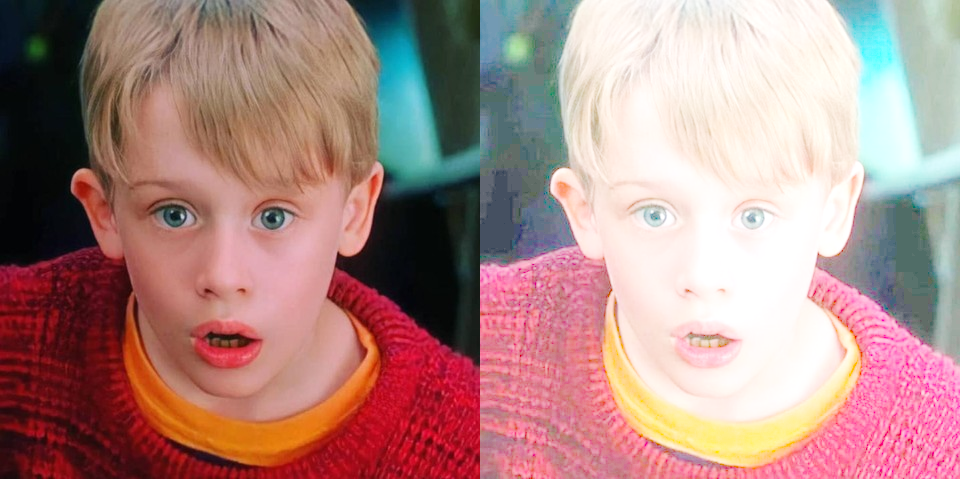

In [11]:
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------------------------------')
try: # untuk menangani error
  brightness = int(input('Masukkan nilai kecerahan: ')) # membuat inputan user
except ValueError: # menjalankan kode ketika error
  print('Error, not a number') # menampilkan message, penanda error

brightness_img = ori.copy()  # membuat salinan gambar asli untuk gambar manipulasi

for y in range(ori.shape[0]): # iterasi baris gambar
  for x in range(ori.shape[1]): # iterasi kolom gambar
    for c in range(ori.shape[2]): # iterasi warna (R, G, B) di setiap pixel
      r = ori[y,x,c] # nilai grey-level input gambar
      brightness_img[y,x,c] = np.clip(brightness*np.log(1+r),0,255) # formula untuk logarithmic brightness yaitu s=c*log(1+r)

final_frame = cv.hconcat((ori, brightness_img)) # menggabungkan 2 gambar menjadi 1
cv2_imshow(final_frame) # menampilkan gambar

**Averaging**

Grayscale Average
--------------------------------------------------------


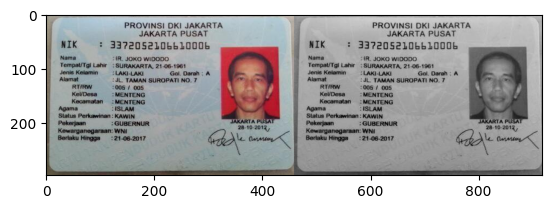

In [18]:

print('Grayscale Average')
print('--------------------------------------------------------')

# Membaca Image
ori = cv.imread('/content/drive/MyDrive/Colab Notebooks/image/ktp.jpeg')
# merubah color dari BGR ke RBG
ori = cv.cvtColor(ori, cv.COLOR_BGR2RGB)

# membuat array dengan range yang sama dengan gambar
grey_scale_avg = np.zeros(ori.shape, ori.dtype)

# Range Tinggi gambar
for y in range(ori.shape[0]):
  # Range Lebar gambar
  for x in range(ori.shape[1]):
    # merubah RGB menjadi grayscale dengan rumus Average
    grey_scale_avg[y,x] = np.sum(ori[y, x]) / 3

# Menggabungkan 2 gambar menjadi 1
final_gray_avg = cv.hconcat((ori, grey_scale_avg))
# menampilkan gambar
plt.imshow(final_gray_avg)


**Lightness**

Grayscale Lightness
--------------------------------------------------------


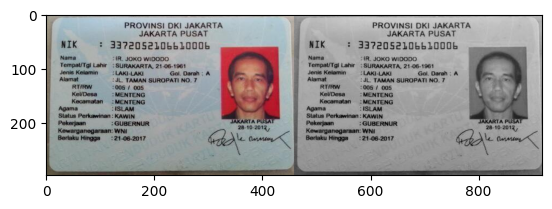

In [19]:
print('Grayscale Lightness')
print('--------------------------------------------------------')

# Membaca Image
ori = cv.imread('/content/drive/MyDrive/Colab Notebooks/image/ktp.jpeg')
# merubah color dari BGR ke RBG
ori = cv.cvtColor(ori, cv.COLOR_BGR2RGB)

# membuat array dengan range yang sama dengan gambar
grey_scale_light = np.zeros(ori.shape, ori.dtype)

# Range Tinggi gambar
for y in range(ori.shape[0]):
  # Range Lebar gambar
  for x in range(ori.shape[1]):
    # merubah RGB menjadi grayscale dengan rumus Lightness
    grey_scale_light[y,x] = np.mean([np.max(ori[y, x]), np.min(ori[y, x])])

# Menggabungkan 2 gambar menjadi 1
final_gray_light = cv.hconcat((ori, grey_scale_light))
# menampilkan gambar
plt.imshow(final_gray_light)

**Luminance**

Grayscale Luminance
--------------------------------------------------------


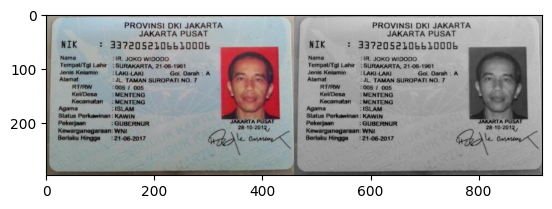

In [20]:
print('Grayscale Luminance')
print('--------------------------------------------------------')

# Membaca Image
ori = cv.imread('/content/drive/MyDrive/Colab Notebooks/image/ktp.jpeg')
# merubah color dari BGR ke RBG
ori = cv.cvtColor(ori, cv.COLOR_BGR2RGB)

# membuat array dengan range yang sama dengan gambar
grey_scale_lum = np.zeros(ori.shape, ori.dtype)

# Range Tinggi gambar
for y in range(ori.shape[0]):
  # Range Lebar gambar
  for x in range(ori.shape[1]):
    # merubah RGB menjadi grayscale dengan rumus Luminance
    grey_scale_lum[y,x] = int(0.21 * ori[y, x][0] + 0.72 * ori[y, x][1] + 0.07 * ori[y, x][2])

# Menggabungkan 2 gambar menjadi 1
final_gray_lumin = cv.hconcat((ori, grey_scale_lum))
# menampilkan gambar
plt.imshow(final_gray_lumin)


**Grayscale**

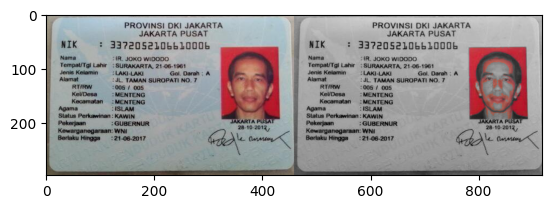

In [21]:
# Membaca Image
ori = cv.imread('/content/drive/MyDrive/Colab Notebooks/image/ktp.jpeg')
# merubah color dari BGR ke RBG
ori = cv.cvtColor(ori, cv.COLOR_BGR2RGB)

# membuat array dengan range yang sama dengan gambar
grey_scale = np.zeros(ori.shape, ori.dtype)

# Range Tinggi gambar
for y in range(ori.shape[0]):
  # Range Lebar gambar
  for x in range(ori.shape[1]):
    # Menguraikan warna RGB
    R, G, B = ori[y, x]
    # jika RGB masih dalam range warna merah
    if (R >= 129 and R <= 255) and (G >= 0 and G <= 100) and (B >= 0 and B <= 100):
      # warna tetap
      grey_scale[y, x] = ori[y, x]
    else:
      # jadikan warna greyscale
      grey_scale[y, x] = np.mean(ori[y, x])

# Menggabungkan 2 gambar menjadi 1
final_red_color = cv.hconcat((ori, grey_scale))
# menampilkan gambar
plt.imshow(final_red_color)
